In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("../")

In [3]:
from data_processing.start_experiment import *
from data_processing.read_data import *
from data_processing.gaussian import *

In [4]:
import numpy as np
import pods
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

In [5]:
import mlai

In [6]:
import deepgp

In [7]:
from mlai.deepgp_tutorial import initialize
from mlai.deepgp_tutorial import staged_optimize
from mlai.deepgp_tutorial import posterior_sample
from mlai.deepgp_tutorial import visualize
from mlai.deepgp_tutorial import visualize_pinball

import deepgp
deepgp.DeepGP.initialize=initialize
deepgp.DeepGP.staged_optimize=staged_optimize
deepgp.DeepGP.posterior_sample=posterior_sample
deepgp.DeepGP.visualize=visualize
deepgp.DeepGP.visualize_pinball=visualize_pinball

In [8]:
offset = y.mean()
scale = np.sqrt(y.var())
yhat = (y - offset)/scale

In [192]:
print(x.shape[1])
# print(x)

1


NameError: name 'xlim' is not defined

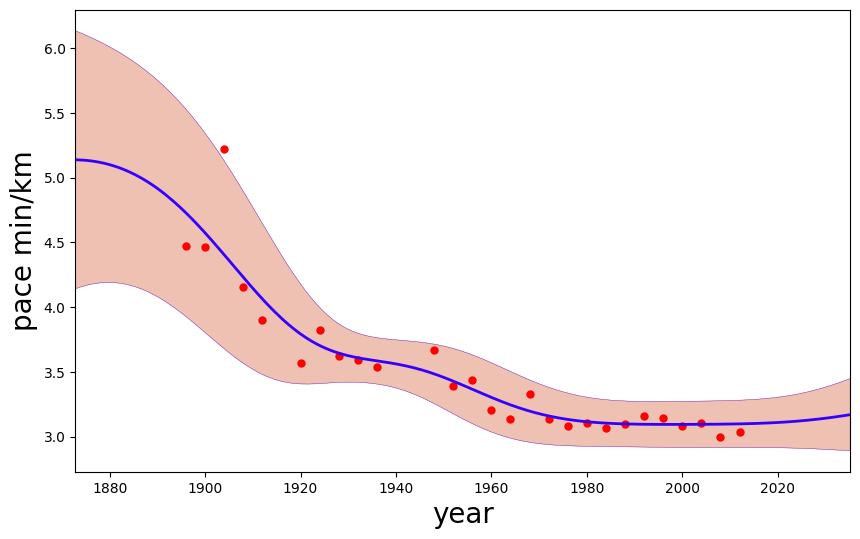

In [9]:
hidden = 1

m = deepgp.DeepGP([y.shape[1],hidden,x.shape[1]],Y=yhat, X=x, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,ARD=True),
                           GPy.kern.RBF(x.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=50, back_constraint=False)

m.initialize()


for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(messages=True,max_iters=100)
m.staged_optimize(messages=(True,True,True))

import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai


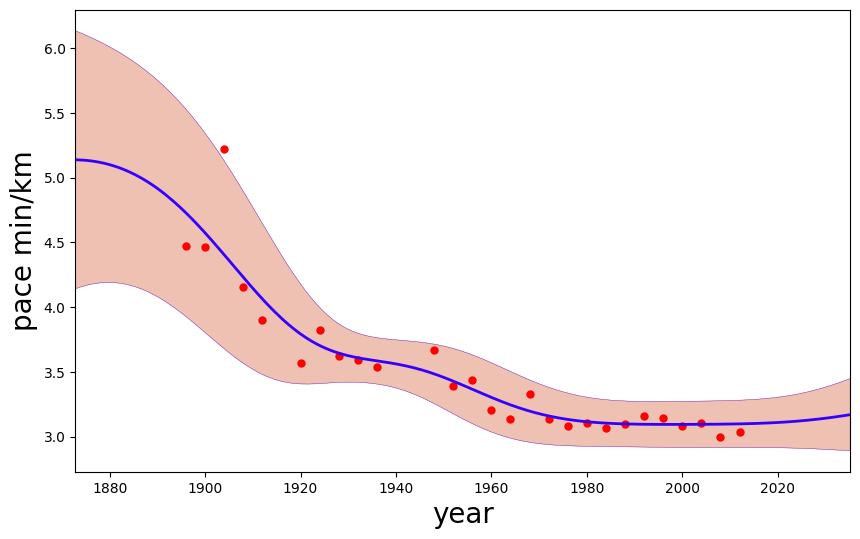

In [14]:
xlim = (1875,2030)
ylim = (2.5, 6.5)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, xlabel='year', ylabel='pace min/km', 
          fontsize=20, portion=0.2)
# ax.set_xlim(xlim)

# ax.set_ylim(ylim)
# mlai.write_figure(figure=fig, filename='./deepgp/aa.svg', 
#                 transparent=True)

In [15]:
num_experiments = 100
parameter_list = ['gamma', 'gradnoise']

In [16]:
file_names = ["gradient_latin/latin_{}.par".format(i) for i in range(num_experiments)]
data_files = ["gradient_latin/data_cellcount_{}.txt".format(i) for i in range(num_experiments)]

In [17]:
X = get_parameter_array(file_names,parameter_list)

In [18]:
print(X[97])

[2.     0.4313]


In [19]:
Y = get_timestep_rewards(data_files[97], function_at_each_timestep(distance_to_peak_gradient))

In [20]:
print(Y)

[247.86015838 245.03358601 237.1721422  227.06328703 224.45229334
 233.09224536 234.68890306 234.15305291 221.8274417  220.54903684
 220.39453279 212.69502621 204.72941072 193.78087201 181.92214081
 176.1708851  171.33311232 177.01178056 177.5966928  171.26863539
 164.61732762 157.05171945 145.57144359 133.48373713 124.75866085
 119.08200292 115.32459506 120.87511175 132.0798591  128.03718521
 114.63050245 112.6589429  105.81584277  91.55026151  89.78661843
  78.5196714   76.14379854  71.93507008  73.07223991  77.91814251
  74.3182284 ]


In [24]:
Y_2d = np.atleast_2d(Y)

In [28]:
final_y = Y_2d.T

In [190]:
# print(final_y)

In [33]:
offset = final_y.mean()
scale = np.sqrt(final_y.var())
yhat = (final_y - offset)/scale

In [189]:
# print(yhat)

In [38]:
yhat.shape[0]

41

In [35]:
_X_ts = np.atleast_2d(list(range(len(Y))))

In [39]:
final_x =_X_ts.T

In [40]:
hidden = 1

m_dist = deepgp.DeepGP([yhat.shape[1],hidden,final_x.shape[1]],Y=yhat, X=final_x, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,ARD=True),
                           GPy.kern.RBF(x.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=50, back_constraint=False)

m_dist.initialize()


for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m_dist.optimize(messages=True,max_iters=100)
m_dist.staged_optimize(messages=(True,True,True))

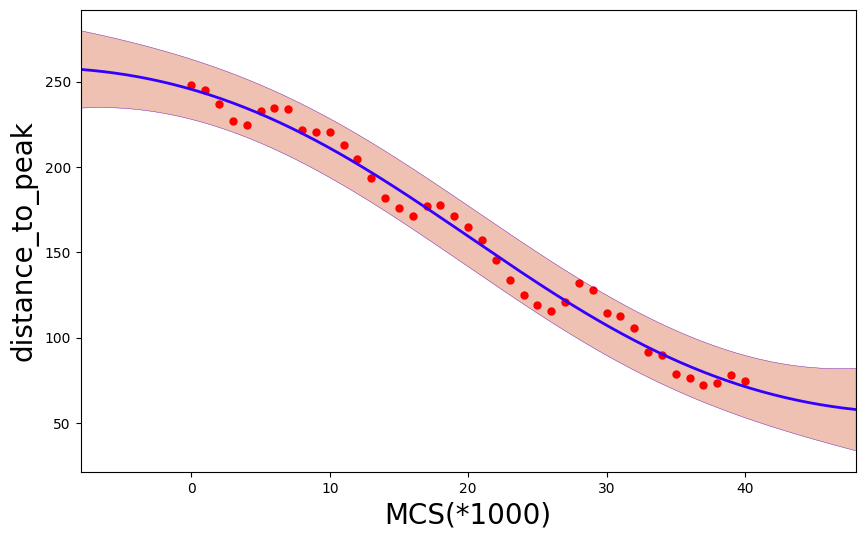

In [42]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_dist, scale=scale, offset=offset, ax=ax, xlabel='MCS(*1000)', ylabel='distance_to_peak', 
          fontsize=20, portion=0.2)

In [47]:
hidden = 1

m_dist_mat = deepgp.DeepGP([yhat.shape[1],hidden,final_x.shape[1]],Y=yhat, X=final_x, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,ARD=True),
                           GPy.kern.Matern52(x.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=50, back_constraint=False)

m_dist_mat.initialize()


for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m_dist_mat.optimize(messages=True,max_iters=100)
m_dist_mat.staged_optimize(messages=(True,True,True))

In [46]:
kernel = GPy.kern.Matern52(x.shape[1], ARD=True)

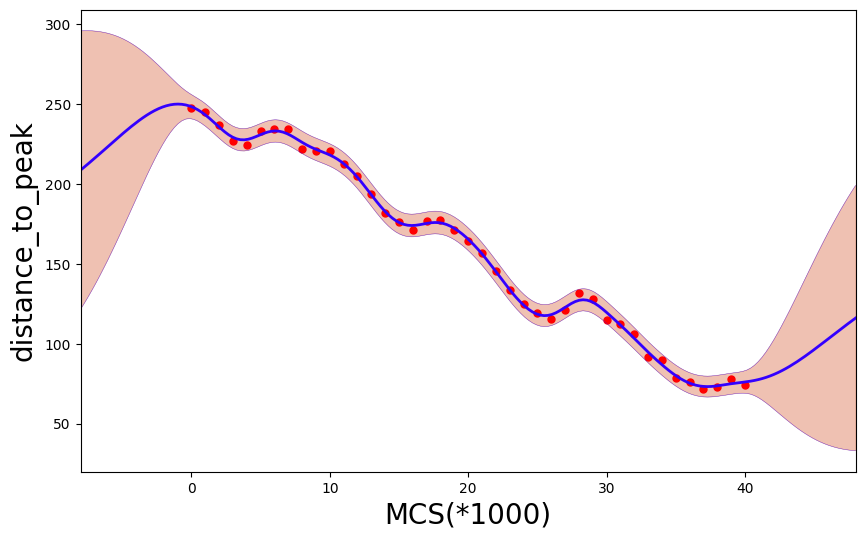

In [48]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_dist_mat, scale=scale, offset=offset, ax=ax, xlabel='MCS(*1000)', ylabel='distance_to_peak', 
          fontsize=20, portion=0.2)

In [62]:
hidden = 1

m_dist_p = deepgp.DeepGP([yhat.shape[1],hidden,final_x.shape[1]],Y=yhat, X=final_x, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,ARD=True),
                           GPy.kern.Cosine(x.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=50, back_constraint=False)

m_dist_p.initialize()


for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m_dist_p.optimize(messages=True,max_iters=100)
m_dist_p.staged_optimize(messages=(True,True,True))

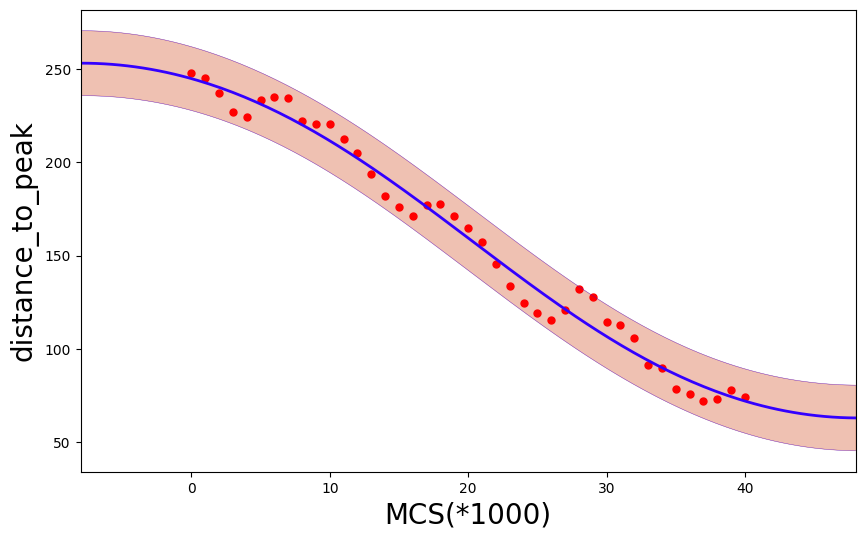

In [64]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_dist_p, scale=scale, offset=offset, ax=ax, xlabel='MCS(*1000)', ylabel='distance_to_peak', 
          fontsize=20, portion=0.2)

m_dist_p.predict([[20]])

In [66]:
m_dist_p.predict(np.array([[20]]))

(array([[0.00699437]]), array([[0.0229708]]))

In [188]:
# print(final_x)

In [89]:
train_data = data_files[:90]
print()
# test_data = data_files[90:-1]

In [90]:
# Emulate distance first
simulation_samples_X = np.empty(shape=[0, 3])
simulation_samples_Y = np.empty(shape=[0, 1])
for i in range(len(train_data)):
    
    
    distance_y = np.array(get_timestep_rewards(data_files[i], function_at_each_timestep(distance_to_peak_gradient)))
#     dist_cells = np.array(get_timestep_rewards(data_files[i], function_at_each_timestep(average_distance_between_cells)))

    if(len(distance_y) != 51):
        print(len(distance_y))
#         continue
    # indeces
    
#     index = np.linspace(0, len(distance_dif)-2,int(len(distance_dif)/2), dtype=int)
#     reward_index = index + 1


#     migration_x = migration_angle_dif[index]
#     chemo_angle_x = chemo_angle_dif[index]
#     distance_x = distance_dif[index]
#     dist_cells_x = dist_cells[index]


#     distance_y = distance_dif[reward_index]

    for j in range(len(distance_y)):
        sim_X = [j, X[i][0], X[i][1]]
        simulation_samples_X = np.vstack([simulation_samples_X, sim_X]) 
        sim_Y = [distance_y[j]]
        simulation_samples_Y = np.vstack([simulation_samples_Y, sim_Y])

    

49
35
22
12
46
6
40
44
22
12


In [92]:
print(simulation_samples_Y.shape)


(4368, 1)


In [93]:
offset = simulation_samples_Y.mean()
scale = np.sqrt(simulation_samples_Y.var())
yhat = (simulation_samples_Y - offset)/scale

In [110]:
hidden = 1

m_dist_f = deepgp.DeepGP([yhat.shape[1],hidden, simulation_samples_X.shape[1]],Y=yhat, X=simulation_samples_X, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,ARD=True),
                           GPy.kern.RBF(simulation_samples_X.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=50, back_constraint=False)

m_dist_f.initialize()


for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m_dist_f.optimize(messages=True,max_iters=3)
m_dist_f.staged_optimize(messages=(True,True,True))

TypeError: unsupported format string passed to NoneType.__format__

In [97]:
m_dist_f.predict(np.array([[1, 20, 0.1]]))

(array([[-1.19563362]]), array([[1.39442047]]))

In [111]:
m_dist_f.predict(np.array([simulation_samples_X[300]]))

(array([[0.41248147]]), array([[1.01154552]]))

In [112]:
print(yhat[300])

[1.08666299]


In [169]:
# test
def create_test(i):
    test_X = np.empty(shape=[0,3])
    test_Y = np.empty(shape=[0,1])
    distance_y = np.array(get_timestep_rewards(data_files[i], function_at_each_timestep(distance_to_peak_gradient)))
    #     dist_cells = np.array(get_timestep_rewards(data_files[i], function_at_each_timestep(average_distance_between_cells)))

    if(len(distance_y) != 51):
        print(len(distance_y))
    #         continue
    # indeces

    #     index = np.linspace(0, len(distance_dif)-2,int(len(distance_dif)/2), dtype=int)
    #     reward_index = index + 1


    #     migration_x = migration_angle_dif[index]
    #     chemo_angle_x = chemo_angle_dif[index]
    #     distance_x = distance_dif[index]
    #     dist_cells_x = dist_cells[index]


    #     distance_y = distance_dif[reward_index]

    for j in range(len(distance_y)):
        sim_X = [j, X[i][0], X[i][1]]
        test_X = np.vstack([test_X, sim_X]) 
        sim_Y = [distance_y[j]]
        test_Y = np.vstack([test_Y, sim_Y])
        
    return test_X, test_Y

In [170]:
test_X, test_Y = create_test(97)

41


In [172]:
mean, var = m_dist_f.predict(test_X)

In [175]:
scale_test = (test_Y - offset)/scale


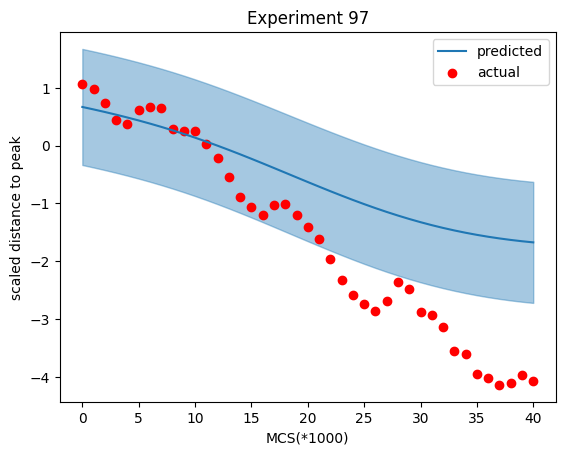

In [179]:
import matplotlib.pyplot as mplot
mplot.plot(mean, label="predicted")
mplot.fill_between(test_X[:,0], mean[:,0] + np.sqrt(var)[:,0], mean[:,0] -np.sqrt(var)[:,0], color="C0", alpha=0.4)
mplot.scatter(test_X[:,0], scale_test, label="actual", color='red')
mplot.xlabel("MCS(*1000)")
mplot.ylabel("scaled distance to peak")
mplot.title("Experiment 97")
mplot.legend()

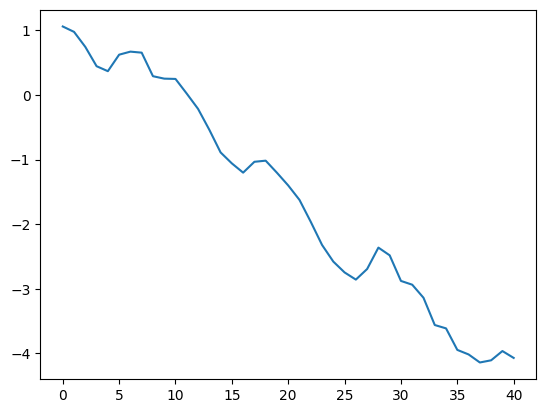

In [119]:
mplot.plot(scale_test)

In [181]:
x_test, y_test = create_test(96)

In [182]:
scale_test = (y_test - offset)/scale
# print(scale_test)

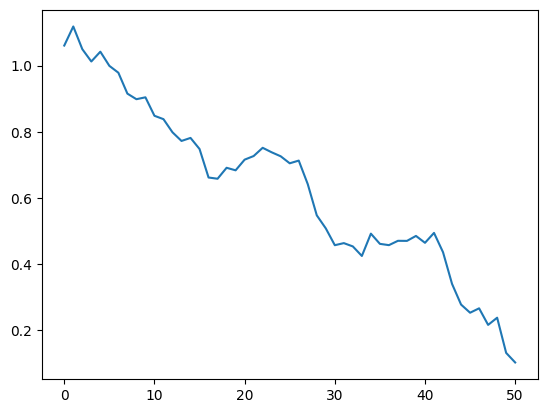

In [183]:
mplot.plot(scale_test)

In [184]:
mean, var = m_dist_f.predict(x_test)

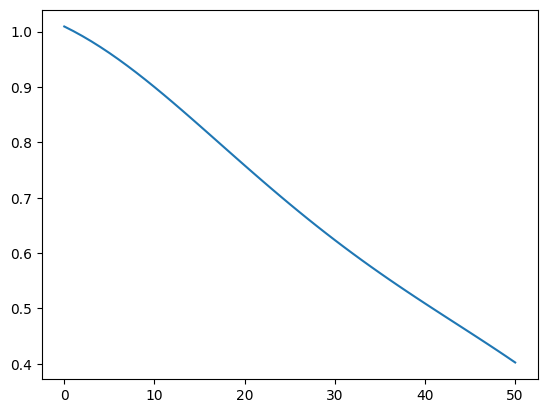

In [185]:
mplot.plot(mean)

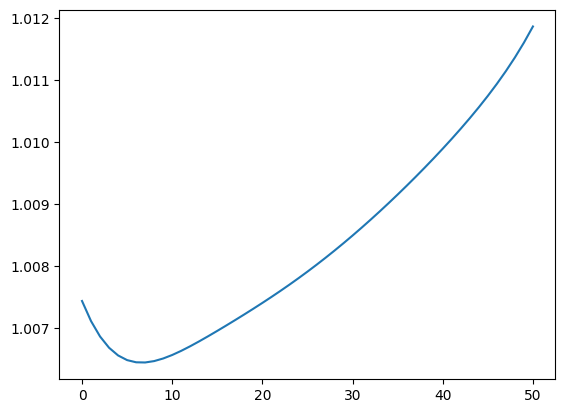

In [186]:
mplot.plot(variance)

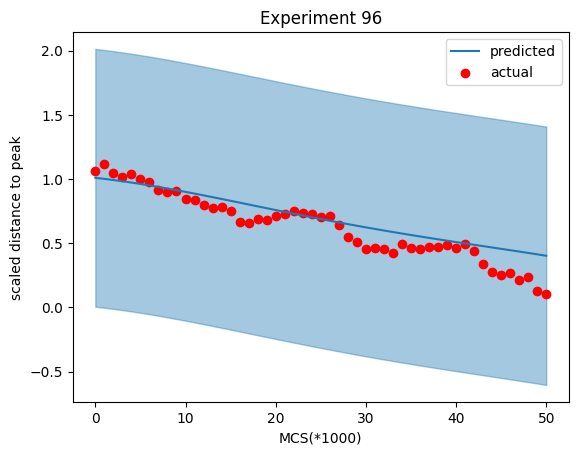

In [193]:
import matplotlib.pyplot as mplot
mplot.plot(mean, label="predicted")
mplot.fill_between(x_test[:,0], mean[:,0] + np.sqrt(var)[:,0], mean[:,0] -np.sqrt(var)[:,0], color="C0", alpha=0.4)
mplot.scatter(x_test[:,0], scale_test, color="red", label="actual")
mplot.xlabel("MCS(*1000)")
mplot.ylabel("scaled distance to peak")
mplot.title("Experiment 96")
mplot.legend()